<a href="https://colab.research.google.com/github/christienatashiaarchie/Pneumonia-Detection/blob/master/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image

%matplotlib inline

In [5]:
# DIR Constants
cwd = os.getcwd()
TRAIN=cwd+'/../Data/JPG/ODCTrain/'
TEST=cwd+'/../Data/JPG/ODCTest/'
VAL=cwd+'/../Data/JPG/ODCValid/'
IMG_SIZE=300

In [6]:
model = tf.keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Add another Dense layer?
    #tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('pneumonia') clas and 1 for ('covid') class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-01-23 20:07:30.772890: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-23 20:07:30.831686: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feff9f041b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-23 20:07:30.831705: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [7]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

In [8]:
# compile the model using binary_crossentropy, accuracy metrics, and the adam optimizer
#model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255, horizontal_flip=True, rotation_range=30, brightness_range=(.8,1.2))
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    TRAIN,
    target_size = (IMG_SIZE,IMG_SIZE),
    batch_size = 74,
    color_mode="rgb",
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    TEST,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 2,
    color_mode="rgb",
    class_mode = 'binary'
)

Found 683 images belonging to 2 classes.
Found 217 images belonging to 2 classes.


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
10/10 [==============================] - 79s 8s/step - loss: 0.8375 - accuracy: 0.5666 - val_loss: 0.6798 - val_accuracy: 0.5853
Epoch 2/10
10/10 [==============================] - 76s 8s/step - loss: 0.6823 - accuracy: 0.5622 - val_loss: 0.6817 - val_accuracy: 0.6682
Epoch 3/10
10/10 [==============================] - 80s 8s/step - loss: 0.6918 - accuracy: 0.5857 - val_loss: 0.6651 - val_accuracy: 0.6129
Epoch 4/10
10/10 [==============================] - 143s 14s/step - loss: 0.6785 - accuracy: 0.5871 - val_loss: 0.6887 - val_accuracy: 0.5853
Epoch 5/10
10/10 [==============================] - 176s 18s/step - loss: 0.6636 - accuracy: 0.5988 - val_loss: 0.6391 - val_accuracy: 0.6037
Epoch 6/10
10/10 [==============================] - 154s 15s/step - loss: 0.6643 - accuracy: 0.6047 - val_loss: 0.6299 - val_accuracy: 0.7558
Epoch 7/10
10/10 [==============================] - 185s 18s/step - loss: 0.6814 - accuracy: 0.6281 - val_loss: 0.6157 - val_accuracy: 0.6682
Epoch 8/10
1

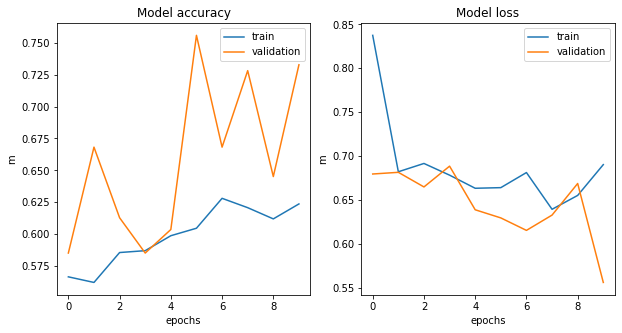

In [11]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

metric = ['accuracy', 'loss']
for i, m in enumerate(metric):
  ax[i].plot(history.history[m])
  ax[i].plot(history.history['val_'+ m])
  ax[i].set_title('Model {}'.format(m))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel('m')
  ax[i].legend(['train', 'validation'])
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [12]:
# commenting out the code so it doesn't run again by accident
model.save('ODCvN_73p_Jan23_01.h5')

In [13]:
# load new unseen dataset
test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    VAL,
    target_size = (300, 300),
    batch_size = 1, 
    color_mode="rgb",
    class_mode = 'binary'
)

eval_result = model.evaluate(test_generator)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

Found 204 images belonging to 2 classes.
204/204 [==============================] - 13s 66ms/step - loss: 0.6322 - accuracy: 0.6569
loss rate at evaluation data : 0.6321595907211304
accuracy rate at evaluation data : 0.656862735748291


[1.]
24.png is Normal


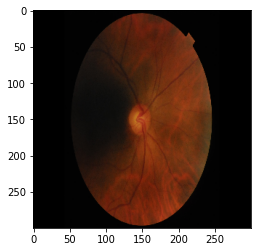

In [14]:
# The file 24.png is ODC
tfile = '24.png'
path = '../Data/ODCPredict/'+tfile

img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
print(classes[0])
if classes[0]> 0.5:
    print(tfile + ' is Normal')
    plt.imshow(img)
else:
    print(tfile + ' is ODC')
    plt.imshow(img)

[1.]
116.png is Normal


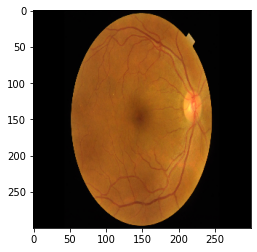

In [15]:
# The file 116.png is Normal
tfile = '116.png'
path = '../Data/ODCPredict/'+tfile

img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)

images = np.vstack([x])
classes = model.predict(images, batch_size = 10)
print(classes[0])
if classes[0]> 0.5:
    print(tfile + ' is Normal')
    plt.imshow(img)
else:
    print(tfile + ' is ODC')
    plt.imshow(img)